# Task 1: Table Booking And Online Delivery

In [2]:
# Import Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [4]:
# Load the data

In [5]:
dataset=pd.read_csv("Dataset .csv")
dataset.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
dataset.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
dataset.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
print(dataset.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [10]:
# Identify the number of rows and columns 

In [11]:
rows, columns = dataset.shape

In [12]:
print(f" Number of Rows :{rows}")

 Number of Rows :9551


In [13]:
print(f"Number of Columns:{columns}")

Number of Columns:21


In [14]:
num_columns=dataset.select_dtypes(include=['float64','int64']).columns

In [15]:
dataset[num_columns] = dataset[num_columns].fillna(dataset[num_columns].mean())

Missing categorical values with the mode

In [17]:
cat_columns= dataset.select_dtypes(include=['object']).columns

In [18]:
dataset[cat_columns] = dataset[cat_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [19]:
print(dataset.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [20]:
total_restaurant = len(dataset)

In [21]:
total_restaurants = len(dataset)
print(f"Total number of restaurants: {total_restaurants}")

Total number of restaurants: 9551


In [22]:
table_booking_count = dataset[dataset['Has Table booking'] == 'Yes'].shape[0]

In [23]:
online_delivery_count = dataset[dataset['Has Online delivery'] == 'Yes'].shape[0]

In [24]:
table_booking_percentage = (table_booking_count / total_restaurants) * 100
online_delivery_percentage = (online_delivery_count / total_restaurants) * 100

In [25]:
print(f"Percentage of restaurants offering table booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering online delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants offering table booking: 12.12%
Percentage of restaurants offering online delivery: 25.66%


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Prepare dataset for visualization
percentages = {
    'Service': ['Table Booking', 'Online Delivery'],
    'Percentage': [table_booking_percentage, online_delivery_percentage]
}
percentages_dataset = pd.DataFrame(percentages)

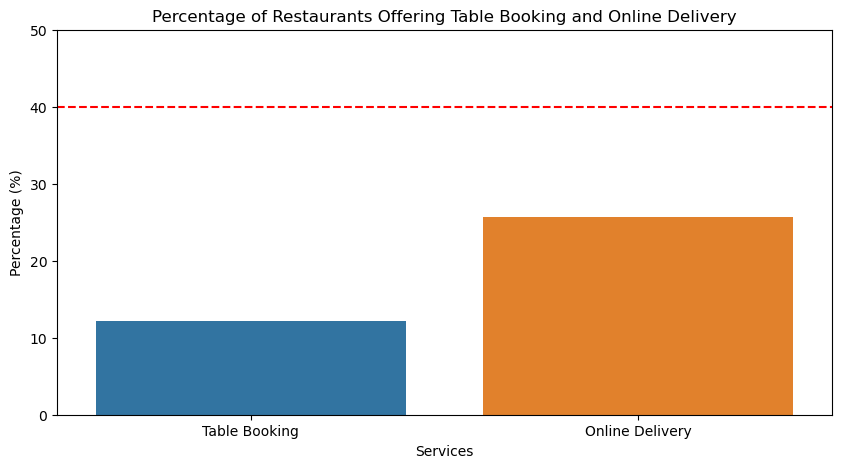

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Service', y='Percentage', data=percentages_dataset)
plt.title('Percentage of Restaurants Offering Table Booking and Online Delivery')
plt.ylabel('Percentage (%)')
plt.xlabel('Services')
plt.ylim(0, 50) 
plt.axhline(y=40, color='r', linestyle='--') 
plt.show()

In [29]:
# Extract the ratings column
ratings = dataset['Aggregate rating']

C:\Users\Shubhya\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


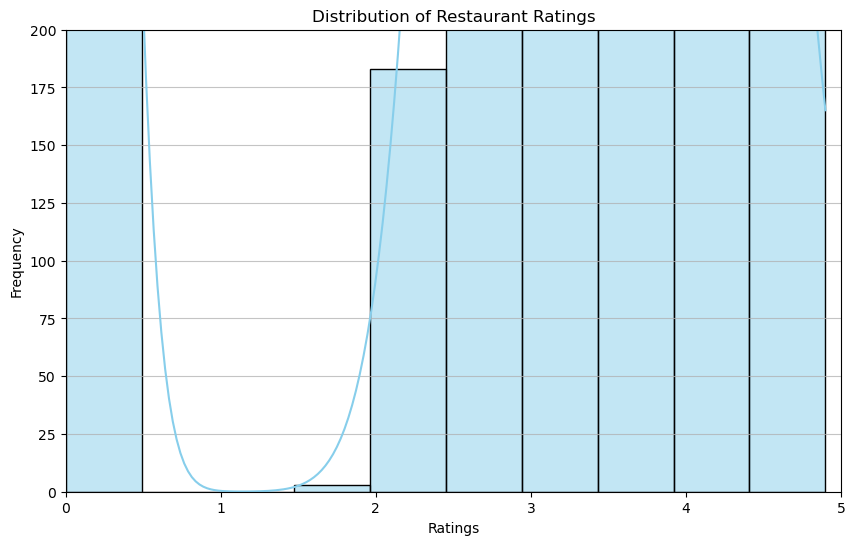

In [30]:
#Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(ratings, bins=10, kde=True, color='skyblue')  
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xlim(0, 5)  # Assuming ratings are on a scale of 0 to 5
plt.ylim(0, 200)  
plt.grid(axis='y', alpha=0.75) 
plt.show()

In [31]:
#Prepare data for visualization
percentages = {
    'Service': ['Table Booking', 'Online Delivery'],
    'Percentage': [table_booking_percentage, online_delivery_percentage],
    'No Service': [100 - table_booking_percentage, 100 - online_delivery_percentage]
}
percentages_dataset = pd.DataFrame(percentages)


Text(0.5, 1.0, 'Percentage of Restaurants Offering Table Booking')

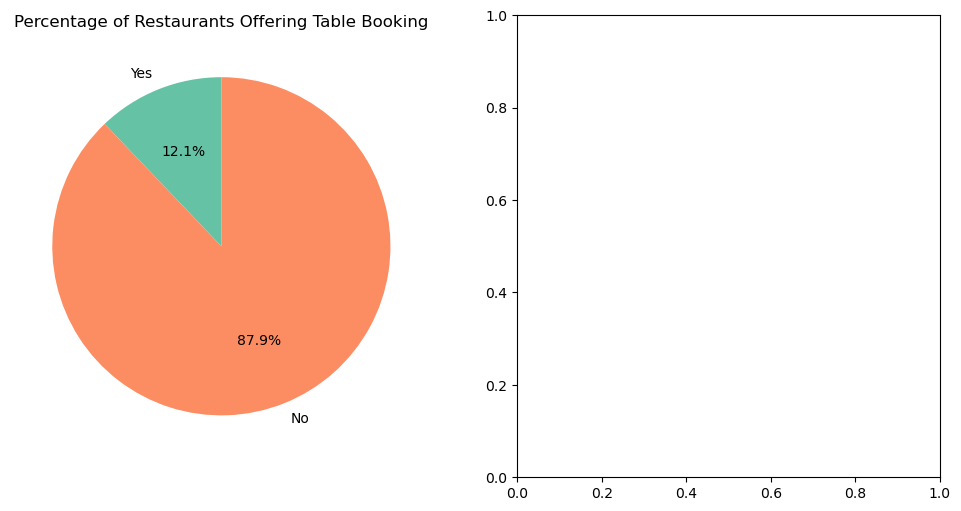

In [32]:
 #Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Pie chart for Table Booking
axes[0].pie(percentages_dataset['Percentage'][:1].tolist() + percentages_dataset['No Service'][:1].tolist(),
            labels=['Yes', 'No'], autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
axes[0].set_title('Percentage of Restaurants Offering Table Booking')


In [33]:
percentages = {
    'Service': ['Table Booking', 'Online Delivery'],
    'Percentage': [table_booking_percentage, online_delivery_percentage],
    'No Service': [100 - table_booking_percentage, 100 - online_delivery_percentage]
}
percentages_dataset = pd.DataFrame(percentages)


Text(0.5, 1.0, 'Percentage of Restaurants Offering Online Delivery')

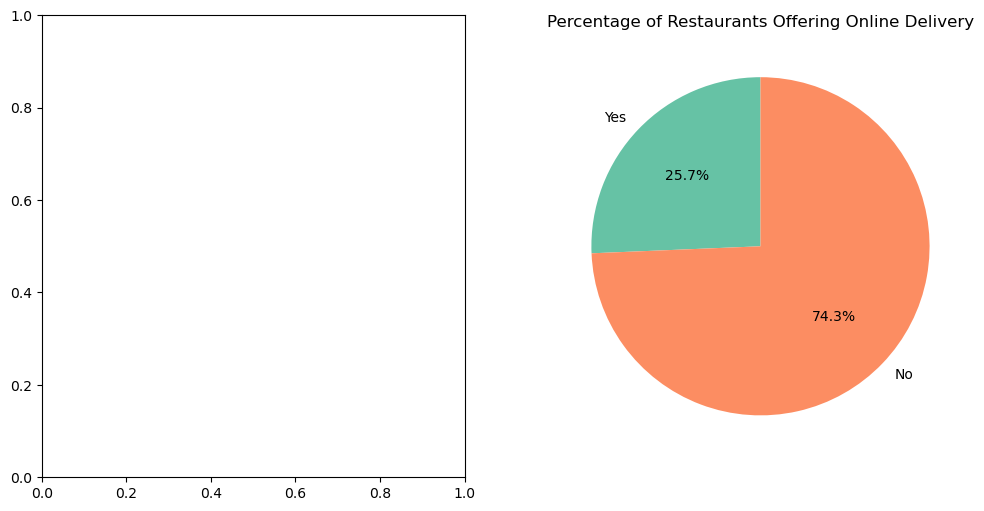

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Pie chart for Online Delivery
axes[1].pie(percentages_dataset['Percentage'][1:].tolist() + percentages_dataset['No Service'][1:].tolist(),
            labels=['Yes', 'No'], autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
axes[1].set_title('Percentage of Restaurants Offering Online Delivery')

Text(0.5, 1.0, 'Percentage of Restaurants Offering Online Delivery')

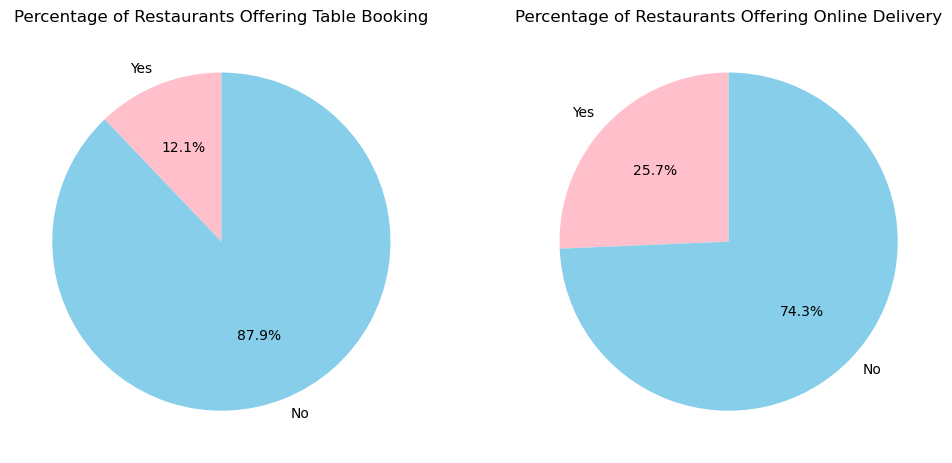

In [35]:
 #Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Pie chart for Table Booking
axes[0].pie(percentages_dataset['Percentage'][:1].tolist() + percentages_dataset['No Service'][:1].tolist(),
            labels=['Yes', 'No'], autopct='%1.1f%%', startangle=90, colors=['pink', 'skyblue'])
axes[0].set_title('Percentage of Restaurants Offering Table Booking')

# Pie chart for Online Delivery
axes[1].pie(percentages_dataset['Percentage'][1:].tolist() + percentages_dataset['No Service'][1:].tolist(),
            labels=['Yes', 'No'], autopct='%1.1f%%', startangle=90, colors=['pink', 'skyblue'])
axes[1].set_title('Percentage of Restaurants Offering Online Delivery')

In [36]:
#  Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
average_ratings = dataset.groupby('Has Table booking')['Aggregate rating'].mean().reset_index()

In [38]:
if 'Has Table booking' in dataset.columns and 'Aggregate rating' in dataset.columns:
    average_ratings = dataset.groupby('Has Table booking')['Aggregate rating'].mean().reset_index()


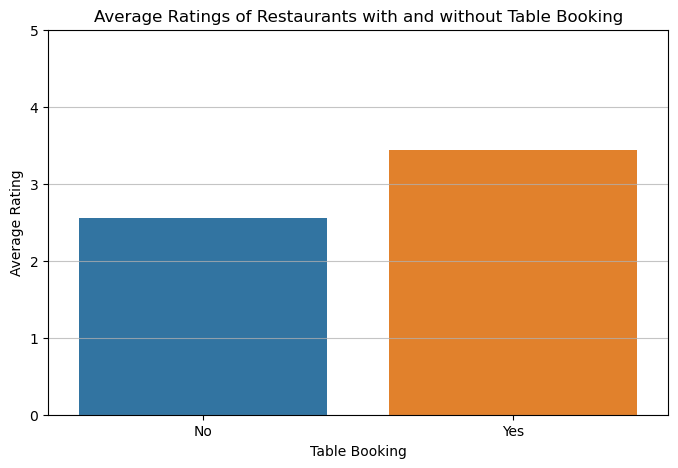

In [39]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Has Table booking', y='Aggregate rating', data=average_ratings)
plt.title('Average Ratings of Restaurants with and without Table Booking')
plt.ylabel('Average Rating')
plt.xlabel('Table Booking')
plt.ylim(0, 5)  
plt.grid(axis='y', alpha=0.75) 
plt.show()

In [40]:
#Prepare data for pie chart
labels = average_ratings['Has Table booking']
sizes = average_ratings['Aggregate rating']    

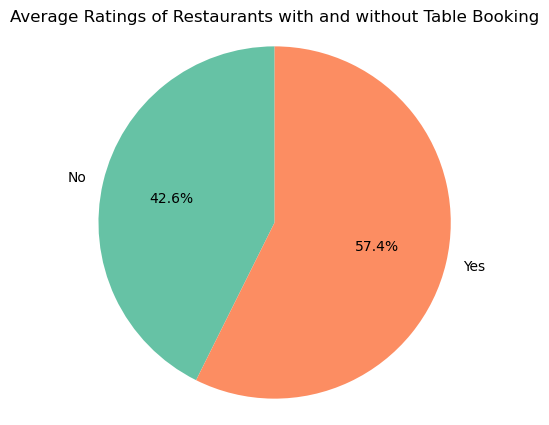

In [41]:
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Average Ratings of Restaurants with and without Table Booking')
plt.axis('equal')  
plt.show()

In [42]:
# Define price ranges

In [43]:
price_ranges = {
    'Low': (0, 10),      
    'Medium': (11, 20),  
    'High': (21, 30)     
}

In [44]:
# Create a new column for price range
def categorize_price(price):
    for category, (low, high) in price_ranges.items():
        if low <= price <= high:
            return category
    return 'Unknown'

In [45]:
# Assuming there is a 'Average Cost for two' column in the dataset
dataset['Price Range'] = dataset['Average Cost for two'].apply(categorize_price)

In [46]:
#Calculate availability of online delivery
online_delivery_availability = dataset.groupby(['Price Range', 'Has Online delivery']).size().unstack(fill_value=0)

# Calculate percentages
online_delivery_percentage = (online_delivery_availability.div(online_delivery_availability.sum(axis=1), axis=0) * 100).reset_index()

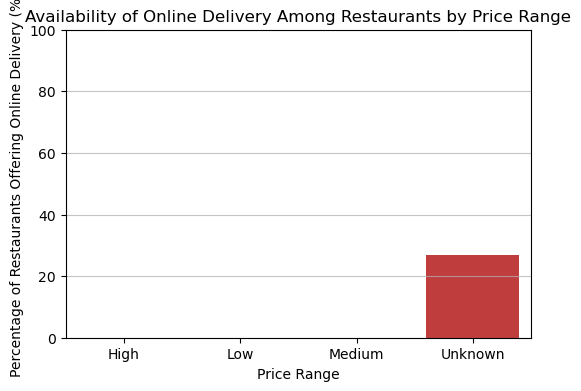

In [47]:
#Visualize the results
plt.figure(figsize=(6, 4))
sns.barplot(x='Price Range', y='Yes', data=online_delivery_percentage)
plt.title('Availability of Online Delivery Among Restaurants by Price Range')
plt.ylabel('Percentage of Restaurants Offering Online Delivery (%)')
plt.xlabel('Price Range')
plt.ylim(0, 100)  
plt.grid(axis='y', alpha=0.75)  
plt.show()

In [48]:
#Prepare data for pie chart
online_delivery_percentage = (online_delivery_availability.div(online_delivery_availability.sum(axis=1), axis=0) * 100).reset_index()


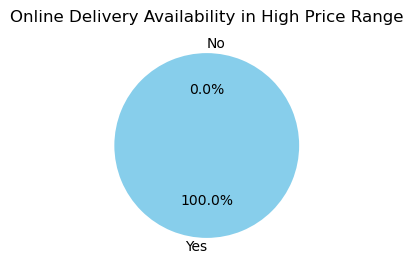

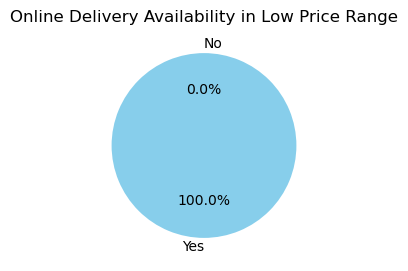

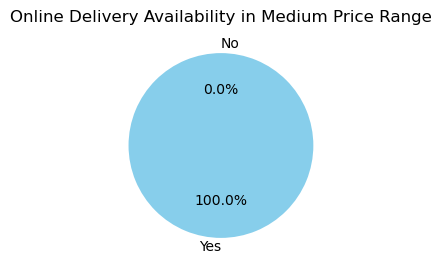

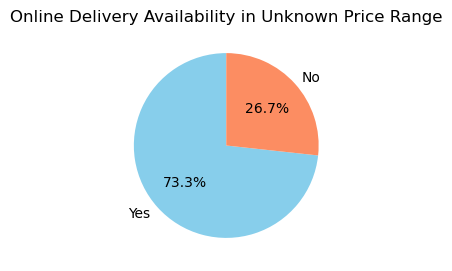

In [49]:
#Create pie charts for each price range
for index, row in online_delivery_percentage.iterrows():
    plt.figure(figsize=(3, 3))
    plt.pie(row[1:], labels=['Yes', 'No'], autopct='%1.1f%%', startangle=90, colors=['skyblue', '#fc8d62'])
    plt.title(f'Online Delivery Availability in {row["Price Range"]} Price Range')
    plt.show()

# Task 2 : Price Range Analysis

In [51]:
# Import  libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
dataset=pd.read_csv("Dataset .csv")
dataset.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [54]:
dataset.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [55]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [56]:
num_columns=dataset.select_dtypes(include=['float64','int64']).columns

In [57]:
dataset[num_columns] = dataset[num_columns].fillna(dataset[num_columns].mean())

Missing categorical values with the mode

In [59]:
cat_columns= dataset.select_dtypes(include=['object']).columns

In [60]:
dataset[cat_columns] = dataset[cat_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [61]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [62]:
#Check the unique price ranges and their counts

In [63]:
Price_counts = dataset['Price range'].value_counts()

In [64]:
#Display the most common price range

In [65]:
most_common_price_range = Price_counts.idxmax()
print(f"\nMost Common Price Range: {most_common_price_range}")
print(f"Frequency: {Price_counts.max()}")


Most Common Price Range: 1
Frequency: 4444


In [66]:
# Visualize the distribution of price ranges

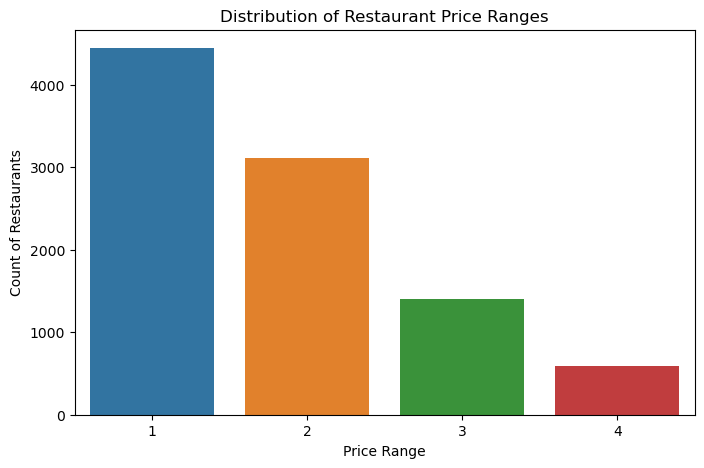

In [67]:
plt.figure(figsize=(8, 5))
sns.barplot(x=Price_counts.index, y=Price_counts.values)
plt.title("Distribution of Restaurant Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Count of Restaurants")
plt.show()

In [68]:
# Count the frequency of each price range
price_range_counts = dataset['Price range'].value_counts()

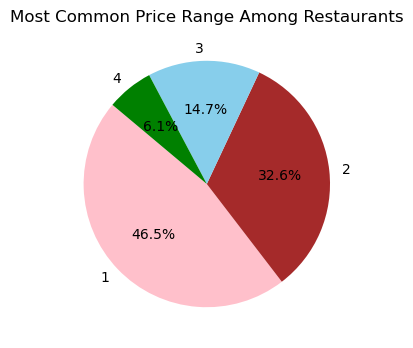

In [69]:
# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', startangle=140,colors = ['pink', 'brown', 'skyblue', 'green'])
plt.title("Most Common Price Range Among Restaurants")
plt.show()

Calculate the average rating for each price range.

In [71]:
#Price range: Represents the price category of the restaurant.
#Aggregate rating: Represents the restaurant's overall rating.

In [72]:
# Group by price range and calculate the average rating
average_ratings = dataset.groupby('Price range')['Aggregate rating'].mean()

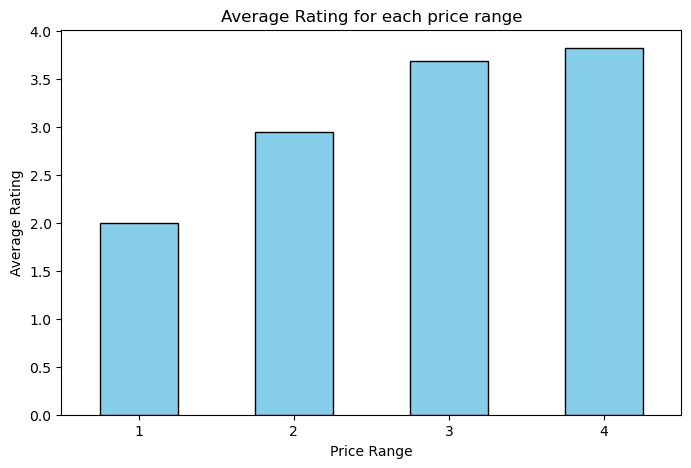

In [73]:
# Plot the results
plt.figure(figsize=(8, 5))
average_ratings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Rating for each price range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

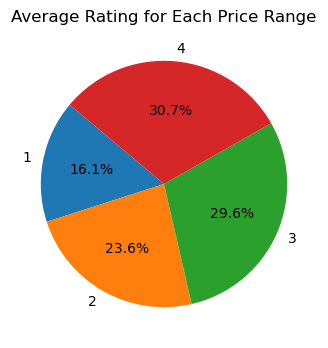

In [74]:
# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(average_ratings, labels=average_ratings.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Rating for Each Price Range')
plt.show()

Identify the color that represents that highest average rating among different price ranges.

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [78]:
#  Group by price range and rating color, then calculate the average rating

In [79]:
rating_summary = dataset.groupby(['Price range', 'Rating color'])['Aggregate rating'].mean().reset_index()

In [80]:
# Group by price range and rating color to find the average aggregate rating

In [81]:
color_rating_summary = (
    dataset.groupby(["Price range", "Rating color"])["Aggregate rating"].mean().reset_index()
)

In [82]:
# Find the color with the highest average rating for each price range

In [83]:
highest_avg_colors = color_rating_summary.loc[color_rating_summary.groupby("Price range")["Aggregate rating"].idxmax()]

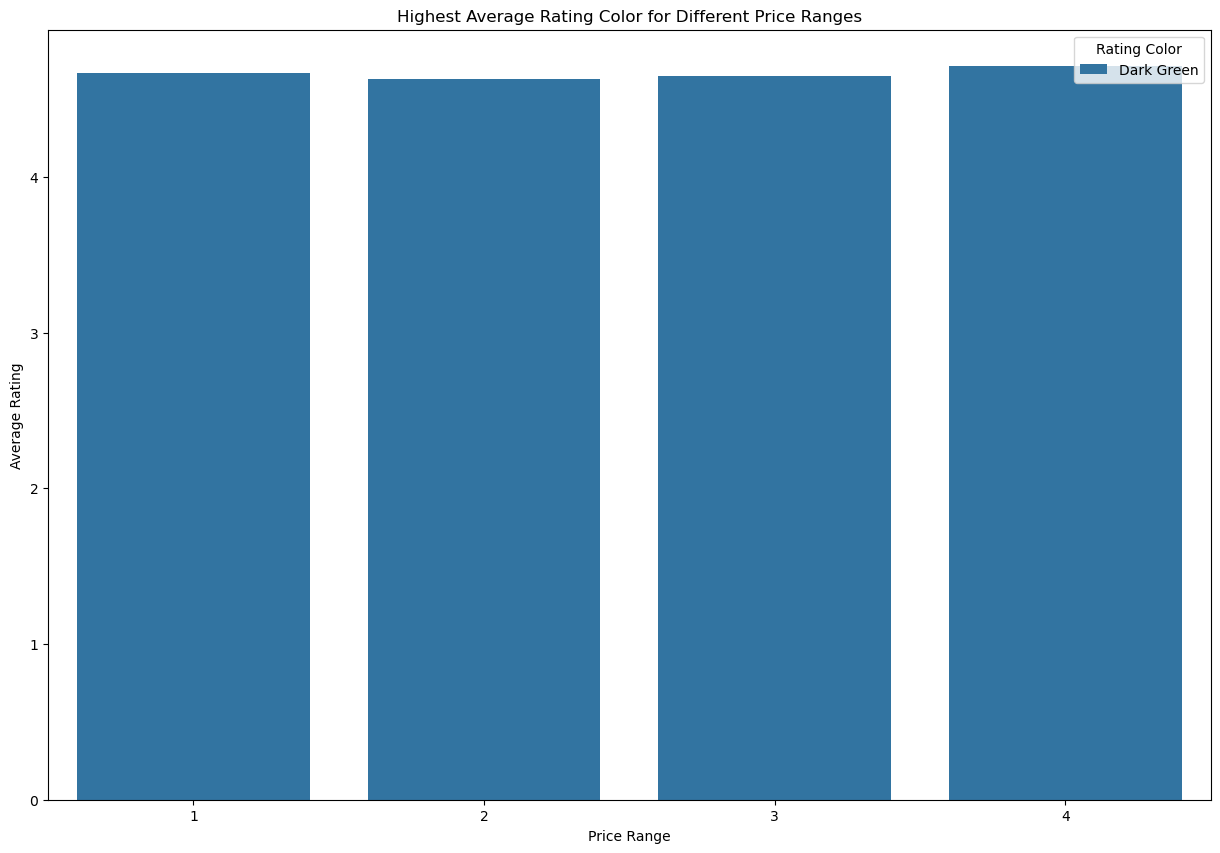

,Price range,Rating color,Aggregate rating
0,1,Dark Green,4.668750
6,2,Dark Green,4.627536
12,3,Dark Green,4.646032
18,4,Dark Green,4.709459


In [84]:
plt.figure(figsize=(15, 10))
sns.barplot(data=highest_avg_colors, x="Price range", y="Aggregate rating",hue="Rating color",)
plt.title("Highest Average Rating Color for Different Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.legend(title="Rating Color")
plt.show()

highest_avg_colors

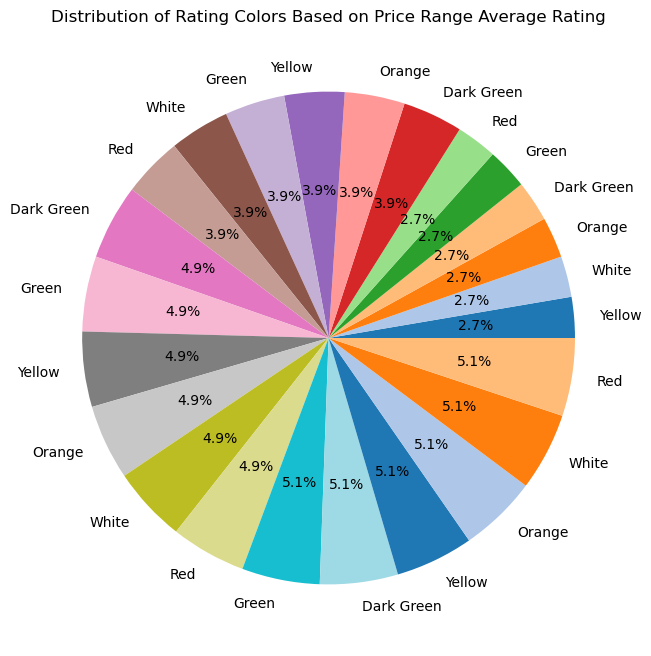

In [85]:
# Group by price range and calculate the average rating
price_rating_data = dataset.groupby('Price range')['Aggregate rating'].mean().reset_index()

# Merge the color associated with the highest rating per price range
price_rating_color_data = dataset[['Price range', 'Rating color']].drop_duplicates()
merged_data = pd.merge(price_rating_data, price_rating_color_data, on='Price range')

# Plotting the pie chart to identify color with the highest average rating
plt.figure(figsize=(8, 8))
plt.pie(
    merged_data['Aggregate rating'],
    labels=merged_data['Rating color'],
    autopct='%1.1f%%',
    colors=plt.cm.tab20.colors
)
plt.title('Distribution of Rating Colors Based on Price Range Average Rating')
plt.show()

In [86]:
# Sample data 
data = {
    'Price range': ['0-500', '0-500', '501-1000', '501-1000', '1001-2000', '1001-2000', '2001-5000', '2001-5000'],
    'Rating color': ['Orange', 'Green', 'Yellow', 'Dark Green', 'Orange', 'Green', 'Yellow', 'Dark Green'],
    'Average Rating': [3.2, 4.1, 3.8, 4.6, 3.5, 4.3, 4.0, 4.8]
}

Grouped Average Ratings:
    Price range Rating color  Aggregate rating
0             1   Dark Green          4.668750
1             1        Green          4.157639
2             1       Orange          3.040464
3             1          Red          2.293548
4             1        White          0.000000
5             1       Yellow          3.661842
6             2   Dark Green          4.627536
7             2        Green          4.159385
8             2       Orange          3.048491
9             2          Red          2.300000
10            2        White          0.000000
11            2       Yellow          3.671159
12            3   Dark Green          4.646032
13            3        Green          4.169231
14            3       Orange          3.097764
15            3          Red          2.305000
16            3        White          0.000000
17            3       Yellow          3.716265
18            4   Dark Green          4.709459
19            4        Green       

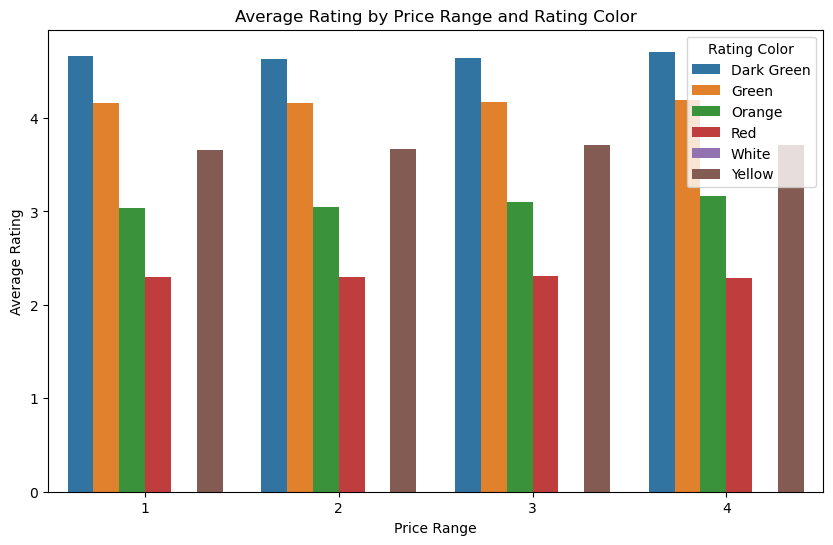

In [87]:
average_ratings = dataset.groupby(['Price range', 'Rating color'])['Aggregate rating'].mean().reset_index()

# Print the grouped DataFrame to check its structure
print("Grouped Average Ratings:")
print(average_ratings)

# Find the color with the highest average rating
highest_avg_rating = average_ratings.loc[average_ratings['Aggregate rating'].idxmax()]

# Print the result
print(f"The color representing the highest average rating is '{highest_avg_rating['Rating color']}' with an average rating of {highest_avg_rating['Aggregate rating']} in the price range '{highest_avg_rating['Price range']}'.")

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=average_ratings, x='Price range', y='Aggregate rating', hue='Rating color')
plt.title('Average Rating by Price Range and Rating Color')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.legend(title='Rating Color')
plt.show()

# Task 3: Feature Engineering

Extrack additional features from the existing columns,such as the length of the restaurant name or address.

In [90]:
dataset.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [91]:
 # Extract additional features

In [92]:
dataset['Name Length'] = dataset['Restaurant Name'].str.len() 
dataset['Address Length'] = dataset['Address'].str.len()        

In [93]:
# Display the updated DataFrame with new features
print(dataset[['Restaurant Name', 'Address', 'Name Length', 'Address Length']].head())

          Restaurant Name                                            Address  \
0        Le Petit Souffle  Third Floor, Century City Mall, Kalayaan Avenu...   
1        Izakaya Kikufuji  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Heat - Edsa Shangri-La  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3                    Ooma  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4             Sambo Kojin  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

   Name Length  Address Length  
0           16              71  
1           16              67  
2           22              56  
3            4              70  
4           11              64  


In [94]:
dataset.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Name Length,Address Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,11,64


In [95]:
# # Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [96]:
# Encode categorical features
dataset_encoded = dataset.copy()
dataset_encoded['Has Table booking'] = dataset_encoded['Has Table booking'].map({'Yes': 1, 'No': 0})
dataset_encoded['Has Online delivery'] = dataset_encoded['Has Online delivery'].map({'Yes': 1, 'No': 0})

In [97]:
# Display the first few rows of the updated dataframe
dataset_encoded[['Has Table booking', 'Has Online delivery']].head()

,Has Table booking,Has Online delivery
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0


In [98]:
# Count values for each category
table_booking_counts = dataset['Has Table booking'].value_counts()
online_delivery_counts = dataset['Has Online delivery'].value_counts()

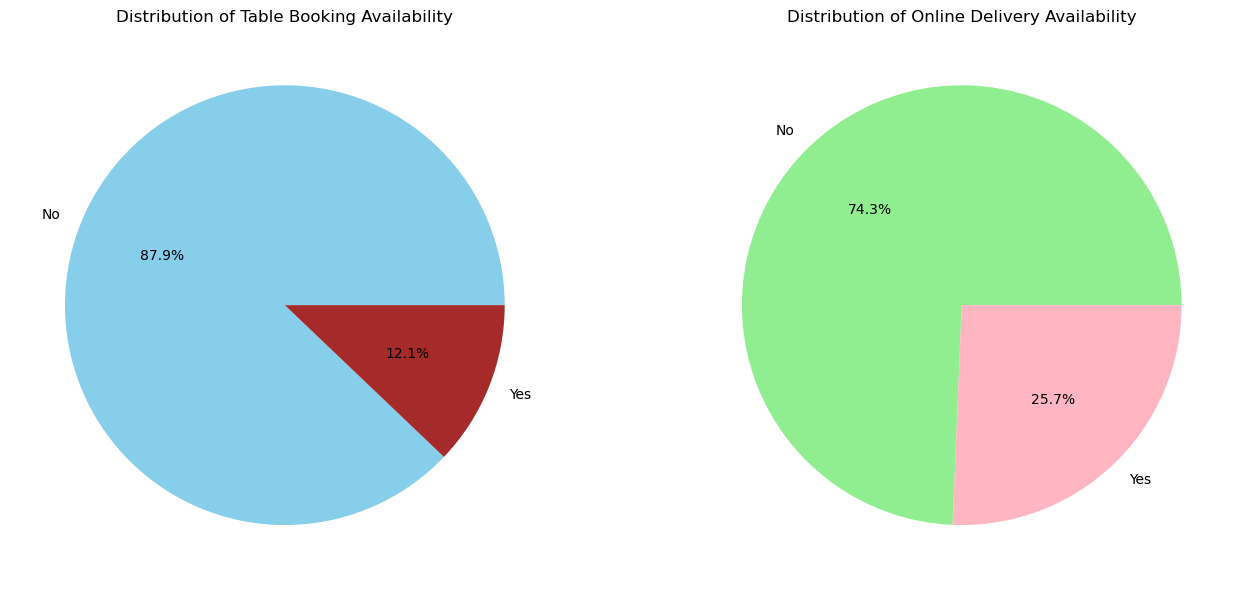

In [99]:
# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


# Pie chart for Has Table Booking
axes[0].pie(
    table_booking_counts, 
    labels=table_booking_counts.index, 
    autopct='%1.1f%%', 
    colors=['skyblue', 'brown']
)
axes[0].set_title('Distribution of Table Booking Availability')


# Pie chart for Has Online Delivery
axes[1].pie(
    online_delivery_counts, 
    labels=online_delivery_counts.index, 
    autopct='%1.1f%%', 
    colors=['lightgreen', 'lightpink']
)
axes[1].set_title('Distribution of Online Delivery Availability')

plt.tight_layout()
plt.show()

#                                                Thank You 